(C:fourier)=
# Fourier Transform

In [1]:
from myst_nb import glue

The two-dimensional Fourier transform is the extension of the well knwon Fourier transform to images {ref}`[Jahne 2005, section 2.3] <C:biblio>`.
We recall that the Fourier transform decompose a signal into a sum of sinusoids,
thus highlighting the frequencies contained in this signal.

## Definition

The discrete Fourier transform (DFT) of an image $f$ of size $M \times N$ is an image $F$ of same size computed with the following definition:

$$
  F(u,v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(m,n) e^{-j\,2\pi \left(\frac{um}{M} + \frac{vn}{N}\right)}
$$

In the sequel, we note $\mathcal{F}$ the DFT so that $\mathcal{F}[f] = F$.

Because the DFT of an image is possibly complex, it cannot be displayed with a single image.
That is why we will show the amplitude (modulus) and phase (argument) of the DFT separately, as in {numref}`F:fourier:example`.

```{glue:figure} G:fourier:example
:name: "F:fourier:example"

DFT of the squirrel. The amplitude is shown with a logarithmic scale to distinguish clearly the details (so we have appled an histogram transformation).
```

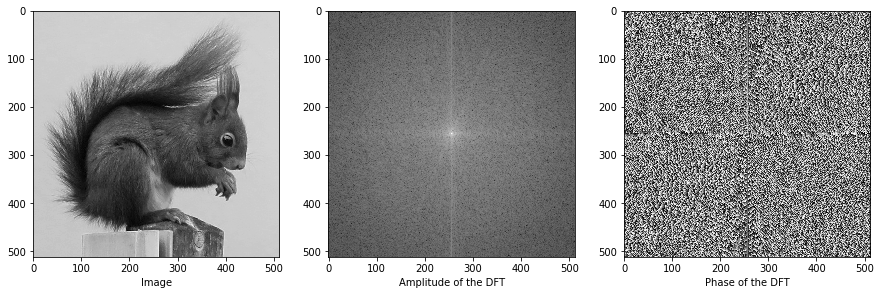

In [2]:
from skimage.io import imread
from numpy import log, absolute, angle
from scipy.fft import fft2, fftshift
from matplotlib.pyplot import figure, subplot, imshow, xlabel

f = imread("figs/squirrel.png")
F = fftshift(fft2(f))

fig = figure(figsize=(15,5))
subplot(1,3,1)
imshow(f, cmap="gray")
xlabel("Image")
subplot(1,3,2)
imshow(log(absolute(F)), cmap="gray")
xlabel("Amplitude of the DFT")
subplot(1,3,3)
imshow(angle(F), cmap="gray")
xlabel("Phase of the DFT")

glue("G:fourier:example", fig, display=False)

The amplitude and phase represent the distribution of energy in the frequency plane.
The low frequencies are located in the center of the image, and the high frequencies near the boundaries.
In the figure above, the gray background is a low frequency area because the intensities of the pixels slowly evolve from one pixel to another.
On the contrary, the tail is a high frequency area because the pixel intensity shows a rapid alternation between the hair and the background.

The inverse discrete Fourier transform computes the original image from a Fourier transform:

$$
  f(m,n) = \frac{1}{MN} \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F(u,v) e^{+j\,2\pi \left(\frac{um}{M} + \frac{vn}{N}\right)}
$$

It is denoted $\mathcal{F}^{-1}$ below.

## Properties

* The DTF is linear:
  
  $$
    \mathcal{F}[af + bg] = aF + bG
    \qquad\text{where}\; a,b\in\mathbb{C}.
  $$
  
* The convolution of two images is equivalent to the multiplication of the DFT of the images:
  \begin{equation*}
    f * g = \mathcal{F}^{-1}[F \times G]
  \end{equation*}

* Separability: the 2D DFT can be obtained by computing a 1D DFT on the rows, then a 1D DFT on the columns.

* The DTF is periodic with periods $M$ and $N$:
  
  $$
    F(u,v) = F(u+k_mM,v) = F(u,v+k_nN) = F(u+k_mM,v+k_nN)
    \qquad\text{where}\; k_m, k_n \in \mathbb{Z}.
  $$

* A translation on the image implies a phase shift on the DFT:
  \begin{equation*}
    \mathcal{F}[f(m-m_0,n-n_0)] = F(u,v) \exp\left(-j2\pi\left(\frac{um_0}{M}+\frac{vn_0}{N}\right)\right)
  \end{equation*}

* A rotation on the image implies the same rotation on the DFT.

## Filtering

The operation of filtering consists in selecting some frequencies in the images.
Especially, we distinguish low-pass filtering which preserves only the low frequencies ({numref}`F:fourier:lowpass`)
and high-pass filtering which preserves only the high frequencies ({numref}`F:fourier:highpass`).

```{glue:figure} G:fourier:lowpass
:name: "F:fourier:lowpass"

Example of low-pass filtering: only the low frequencies are kept.
Top row: spatial domain, bottom row: amplitude of the DFT.
```

```{glue:figure} G:fourier:highpass
:name: "F:fourier:highpass"

Example of high-pass filtering: only the high frequencies (i.e. the sudden changes in the intensities) are kept.
```

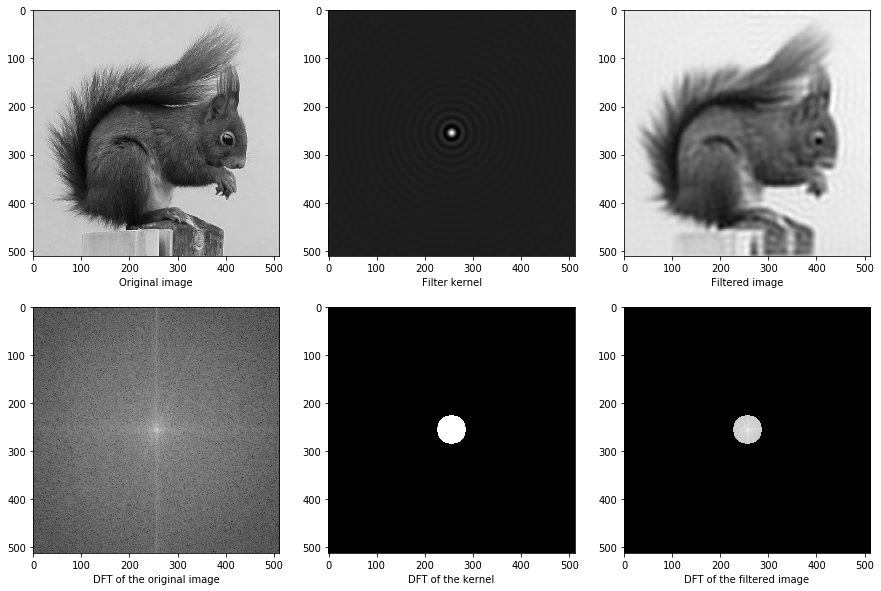

In [3]:
from skimage.io import imread
from skimage import img_as_float
from numpy import log, absolute, angle, linspace, meshgrid, multiply, real
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from matplotlib.pyplot import figure, subplot, imshow, xlabel, gcf
from scipy.signal import convolve2d

# Original image & DFT
g = imread("figs/squirrel.png")
G = fftshift(fft2(g))
N = g.shape[0]

# Filter & DFT
n = linspace(0, N, N)
xx, yy = meshgrid(n, n)
H = ((xx-N/2)**2 + (yy-N/2)**2 < 30**2)
H = img_as_float(H)
h = real(ifft2(ifftshift(H)))
h = fftshift(h) # Pour centrer la PSF

# Filtered image & DFT
F = multiply(G,H)
f = real(ifft2(ifftshift(F)))

# Display images
def display(img, name):
    all_axes = gcf().get_axes()
    subplot(2,3,len(all_axes)+1)
    imshow(img, cmap="gray")
    xlabel(name)
    
fig = figure(figsize=(15,10))
display(g, "Original image")
display(h, "Filter kernel")
display(f, "Filtered image")
display(log(abs(G)), "DFT of the original image")
display(log(abs(H + 1e-9)), "DFT of the kernel")
display(log(abs(F + 1e-9)), "DFT of the filtered image")

glue("G:fourier:lowpass", fig, display=False)

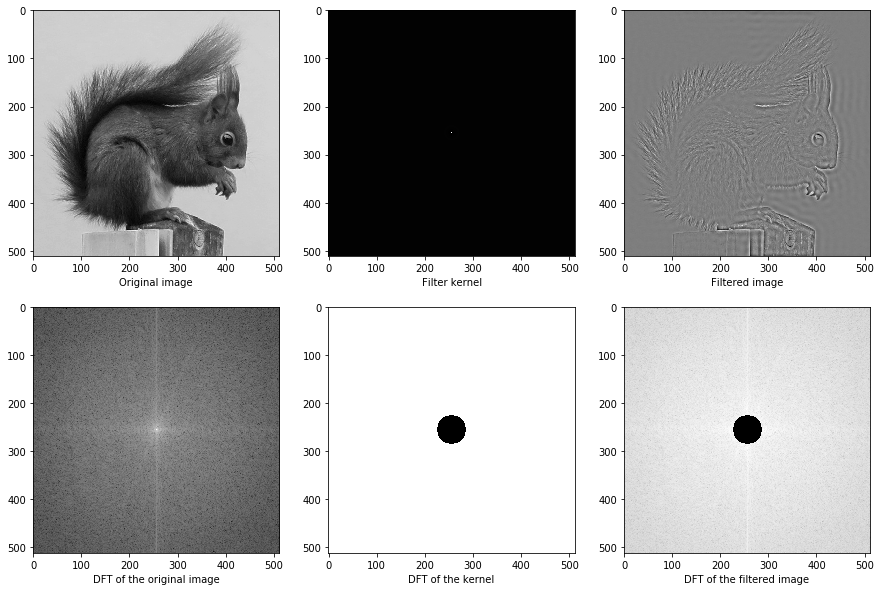

In [4]:
from skimage.io import imread
from skimage import img_as_float
from numpy import log, absolute, angle, linspace, meshgrid, multiply, real
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from matplotlib.pyplot import figure, subplot, imshow, xlabel, gcf
from scipy.signal import convolve2d

# Original image & DFT
g = imread("figs/squirrel.png")
G = fftshift(fft2(g))
N = g.shape[0]

# Filter & DFT
n = linspace(0, N, N)
xx, yy = meshgrid(n, n)
H = ((xx-N/2)**2 + (yy-N/2)**2 > 30**2)
H = img_as_float(H)
h = real(ifft2(ifftshift(H)))
h = fftshift(h) # Pour centrer la PSF

# Filtered image & DFT
F = multiply(G,H)
f = real(ifft2(ifftshift(F)))

# Display images
def display(img, name):
    all_axes = gcf().get_axes()
    subplot(2,3,len(all_axes)+1)
    imshow(img, cmap="gray")
    xlabel(name)
    
fig = figure(figsize=(15,10))
display(g, "Original image")
display(h, "Filter kernel")
display(f, "Filtered image")
display(log(abs(G)), "DFT of the original image")
display(log(abs(H + 1e-9)), "DFT of the kernel")
display(log(abs(F + 1e-9)), "DFT of the filtered image")

glue("G:fourier:highpass", fig, display=False)

In [5]:
# % \subsection{Autres transformées fréquentielles}
# %
# % Pour des utilisations autres que l'\emph{analyse} d'images, il existe d'autres transformées~:
# % \begin{itemize}
# %  \item la transformée en cosinus discrète \eng{discrete cosine transform~: DCT}. \\
# %  Utilisé pour la compression JPEG.
# %  \item les transformées en ondelettes \eng{wavelet transform}. \\
# %  Utilisée pour la compression JPEG2000 (ondelette Cohen--Daubechies--Feauveau).
# % \end{itemize}